<a href="https://colab.research.google.com/github/GetKhanAdil/DataScience/blob/main/house_price_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Reading CSV file

In [ ]:
df=pd.read_csv("House Price.csv")

In [ ]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [ ]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


##### Checking NA values 

In [ ]:
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

###### Droping unNeccesary Coloumn

In [ ]:
df1=df.drop(["Transaction date","latitude","longitude"],axis=1)

###### Renaming The Columns

In [ ]:
df2=df1.rename(columns={'Distance from nearest Metro station (km)':'Distance_from_nearest_Metro_(m)',
                       "House Age":"House_Age",'Number of convenience stores':'Number_of_convenience_stores',
                       "Number of bedrooms":"Number_of_bedrooms","House size (sqft)":"House_size_(sqft)",
                       "House price of unit area":"House_price_per_unit_area"})

In [ ]:
df2

,House_Age,Distance_from_nearest_Metro_(m),Number_of_convenience_stores,Number_of_bedrooms,House_size_(sqft),House_price_per_unit_area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


###### Adding House price Coloumn

In [ ]:
df2["House_price"]=df2["House_size_(sqft)"]*df2["House_price_per_unit_area"]
df2.head()

,House_Age,Distance_from_nearest_Metro_(m),Number_of_convenience_stores,Number_of_bedrooms,House_size_(sqft),House_price_per_unit_area,House_price
0,32.0,84.87882,10,1,575,37.9,21792.5
1,19.5,306.59470,9,2,1240,42.2,52328.0
2,13.3,561.98450,5,3,1060,47.3,50138.0
3,13.3,561.98450,5,2,875,54.8,47950.0
4,5.0,390.56840,5,1,491,43.1,21162.1


In [ ]:
df2.sort_values(by="House_price",ascending=False)

,House_Age,Distance_from_nearest_Metro_(m),Number_of_convenience_stores,Number_of_bedrooms,House_size_(sqft),House_price_per_unit_area,House_price
270,10.8,252.5822,1,2,1373,117.5,161327.5
166,0.0,292.9978,6,3,1448,73.6,106572.8
16,0.0,292.9978,6,3,1441,70.1,101014.1
379,0.0,292.9978,6,3,1410,69.7,98277.0
220,37.2,186.5101,9,2,1187,78.3,92942.1
...,...,...,...,...,...,...,...
226,16.5,4082.0150,0,1,588,12.8,7526.4
331,25.6,4519.6900,0,1,426,15.6,6645.6
48,24.2,4605.7490,0,1,470,13.4,6298.0
116,30.9,6396.2830,1,1,495,12.2,6039.0


#### Exploratory Data Analysis for House Price Prediction

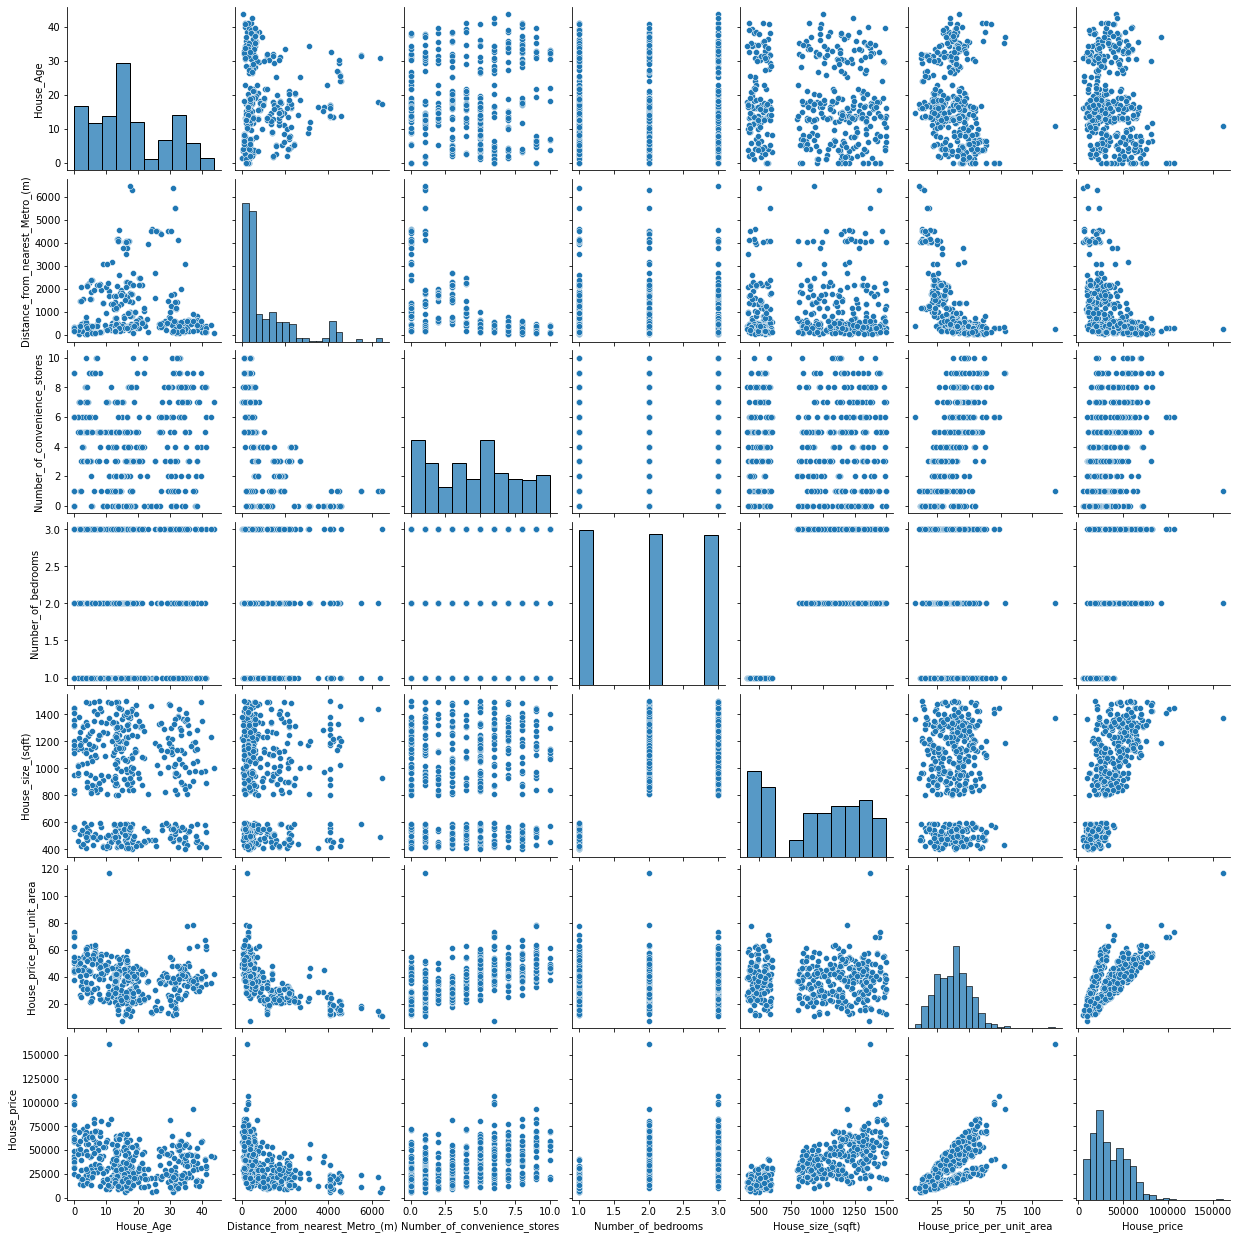

In [ ]:
sns.pairplot(df2)

### Plotting Heat Map For finding Correlation between them

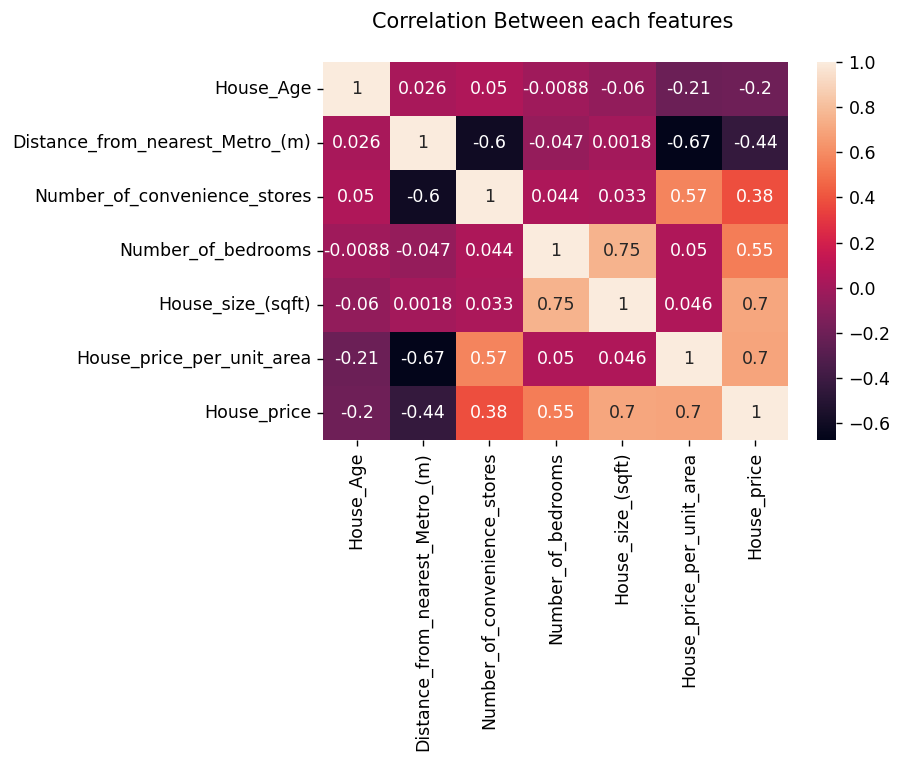

In [ ]:
plt.figure(dpi=125)
sns.heatmap(df2.corr(), annot=True)
plt.title("Correlation Between each features \n")
plt.show()

### here we can see the Corelation between each individual

# 

#### now we are ready for spliting our data into traning and testing phase

In [ ]:
Y=df2["House_price"]

In [ ]:
X=df2.drop(["House_price"],axis=1)

#### Importing train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Importing linear regression for prediction

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

### Testing the Score

In [ ]:
score=lr.score(x_test,y_test)
print("Accuracy of Linear Regression Model is --->",(score*100).round(2),"%")

Accuracy of Linear Regression Model is ---> 95.46 %


In [ ]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
House_Age,-29.659268
Distance_from_nearest_Metro_(m),0.008564
Number_of_convenience_stores,-275.893078
Number_of_bedrooms,529.499938
House_size_(sqft),37.702424
House_price_per_unit_area,997.058425


# 

## Predictions from our Linear Regression Model

In [ ]:
predictions = lr.predict(x_test)

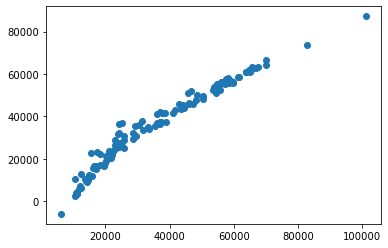

In [ ]:
plt.scatter(y_test,predictions)

###### In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

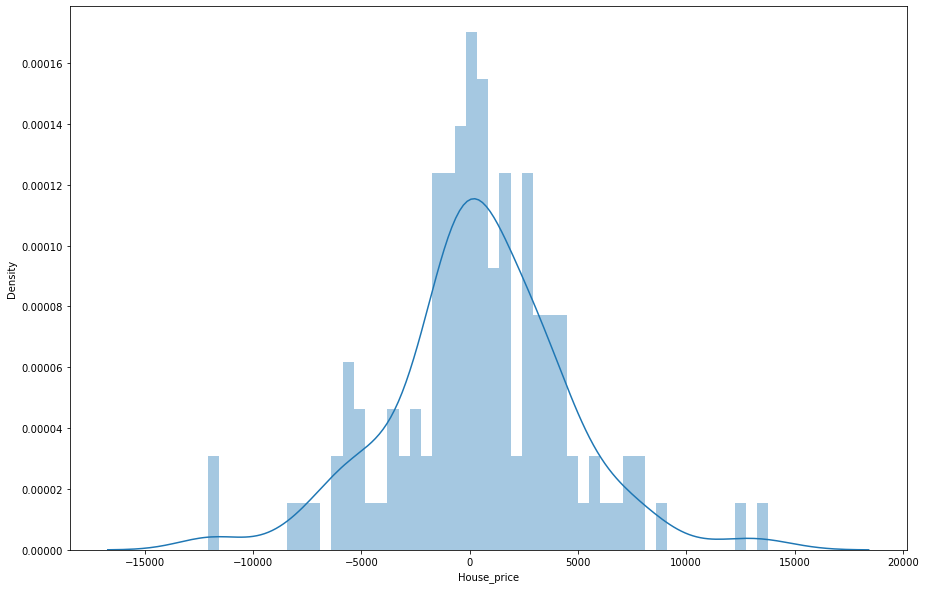

In [ ]:
plt.figure(figsize=[15,10])
sns.distplot((y_test-predictions),bins=50);

###### In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

# 

### Regression Evaluation Metrics

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2950.565290961535
MSE: 16538918.077748477
RMSE: 4066.8068650660653


# 

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.92096496, 0.93967244, 0.92767438, 0.93252287, 0.91356826])

**We can see that in 5 iterations we get a score above 90% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

## Find best model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': (gs.best_score_*100).round(2),
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y).sort_values(by="best_score",ascending=False)

,model,best_score,best_params
2,decision_tree,94.19,"{'criterion': 'mse', 'splitter': 'random'}"
0,linear_regression,92.69,{'normalize': False}
1,lasso,92.69,"{'alpha': 1, 'selection': 'random'}"


#### testing it for random numbers

In [ ]:
lr.predict([[0,0,5,5,4500,50]])

array([183852.92146132])

In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 20, seed = 15,)
 
# Fitting the model
xgb_r.fit(x_train, y_train)

[11:34:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [ ]:
xgb_r.score(x_test,y_test)

0.9884859285043269

In [ ]:
predictions_xgb = xgb_r.predict(x_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_xgb))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb)))

MAE: 1575.40518828125
MSE: 4195831.88857419
RMSE: 2048.372985706995


# XGB 98.8%

# decision_tree	94.19%

# linear_regression	92.69%

# lasso	92.69%

